<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Homework 3: K-nearest Neighbors</h1>
    <h3></h3>
</center>

## Description

<font face="Times New Roman">Students need to implement the KNN classification algorithm, and display the classification diagrams for different values of K .</font>

### 1.1 Data processing

In [64]:
# Load Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [65]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [66]:
# Display part of raw data
df.head(10)
print(df.head(10))  # Display the first 10 rows of DataFrame

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

In [67]:
# Prepare the data
X = df.drop('target', axis=1)
y = df['target']

In [68]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, shuffle=True)

In [70]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_scaled, y, test_size=0.2, random_state=1, shuffle=True)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

### 1.2 Model training and prediction

In [71]:
# Build a K-nearest Neighbors model and fit the data
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_pca, y_train_pca)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [72]:
# Prediction
y_pred = knn.predict(X_test_pca)

### 1.3 Performance metrics

In [73]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_pca, y_pred)
print(f'K={6}, Accuracy = {acc:4f}')

K=6, Accuracy = 0.966667


In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report: ")
print(classification_report(y_test_pca, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



precision：精确率，表示预测为正例的样本中真正为正例的比例。精确率越高，说明模型预测为正例的样本中，真正为正例的样本越多。

recall：召回率，表示真正为正例的样本中被预测为正例的比例。召回率越高，说明模型找出了越多的真正正例。

f1-score：F1分数，是精确率和召回率的调和平均数。F1分数越高，说明模型在精确率和召回率之间取得了更好的平衡。

support：支持数，即该类别的样本数。

## 3 Visualizing results

### 3.1 Confusion Matrix

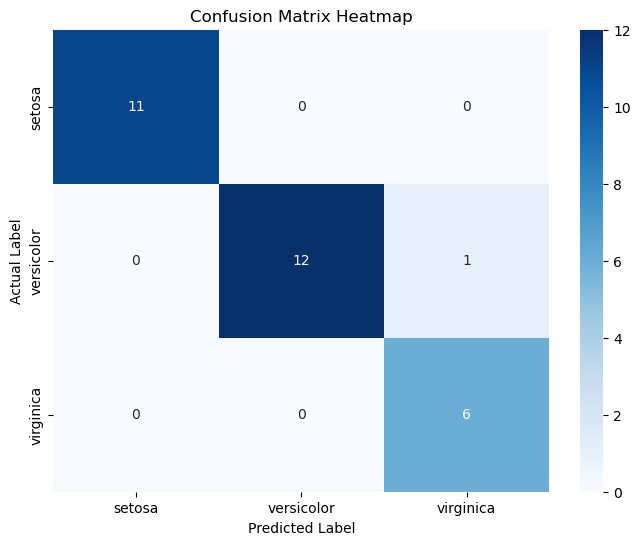

In [75]:
import seaborn as sns

# 计算混淆矩阵
cm_df = pd.DataFrame(confusion_matrix(y_test_pca, y_pred),
                     index=iris.target_names,
                     columns=iris.target_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


### 3.2 Decision boundary

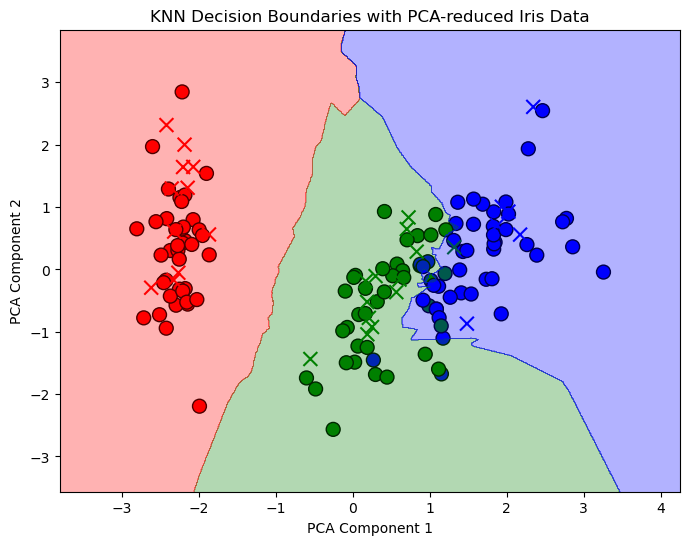

In [76]:
# Define the plotting function
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=ListedColormap(['red', 'green', 'blue']), edgecolor='k', s=100)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, marker='x', cmap=ListedColormap(['red', 'green', 'blue']), s=100)

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green', 'blue']))
plt.title('KNN Decision Boundaries with PCA-reduced Iris Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Effect of different K values

K = 1, Accuracy = 0.9000
K = 2, Accuracy = 0.9000
K = 3, Accuracy = 0.9333
K = 4, Accuracy = 0.9667
K = 5, Accuracy = 0.9333
K = 6, Accuracy = 0.9667
K = 7, Accuracy = 0.9667
K = 8, Accuracy = 0.9667
K = 9, Accuracy = 0.9667


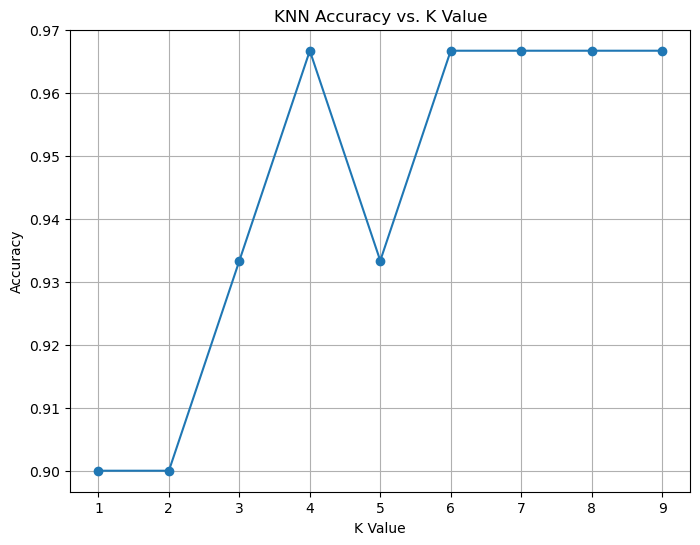

In [77]:
# Test different K values
k_values = range(1, 10)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train_pca)
    y_pred_k = knn.predict(X_test_pca)
    acc_k = accuracy_score(y_test_pca, y_pred_k)
    accuracies.append(acc_k)
    print(f'K = {k}, Accuracy = {acc_k:.4f}')

plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


K = 1, Weighted F1 Score = 0.9018
K = 2, Weighted F1 Score = 0.9018
K = 3, Weighted F1 Score = 0.9353
K = 4, Weighted F1 Score = 0.9673
K = 5, Weighted F1 Score = 0.9353
K = 6, Weighted F1 Score = 0.9673
K = 7, Weighted F1 Score = 0.9673
K = 8, Weighted F1 Score = 0.9673
K = 9, Weighted F1 Score = 0.9673


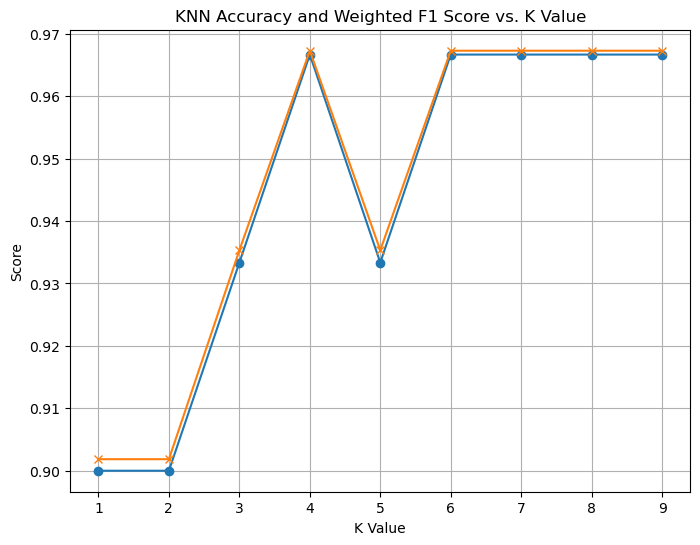

In [78]:
from sklearn.metrics import f1_score
weighted_f1_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train_pca)
    y_pred_k = knn.predict(X_test_pca)
    weighted_f1_score = f1_score(y_test_pca, y_pred_k, average='weighted')
    print(f'K = {k}, Weighted F1 Score = {weighted_f1_score:.4f}')
    weighted_f1_scores.append(weighted_f1_score)

plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies, marker='o')
plt.plot(k_values, weighted_f1_scores, marker='x')
plt.title('KNN Accuracy and Weighted F1 Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.grid(True)
plt.show()